In [1]:
%load_ext autoreload
%autoreload 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%aimport utils

In [32]:
metrics_df_log = utils.load_log_histories(path='histories')

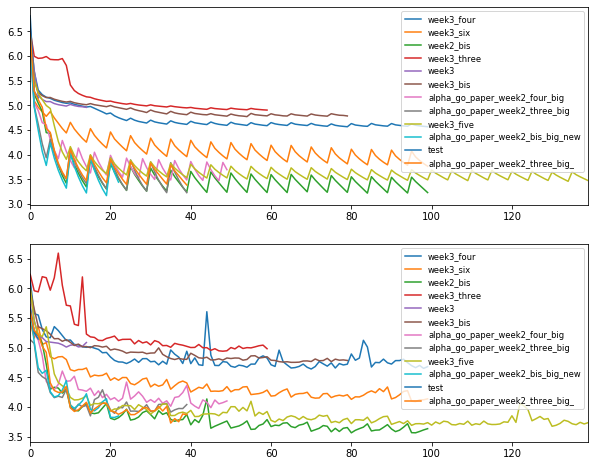

In [43]:
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('small')
# legend([plot1], "title", prop=fontP) 

#plt.plot(metrics_df.iloc[:, metrics_df.columns.get_level_values(1)=='val_loss'])
fig, ax = plt.subplots(2, figsize = (10,8))
metrics_df_log.swaplevel(0, 1, 1).loc[:,'loss'].plot(ax=ax[0])
metrics_df_log.swaplevel(0, 1, 1).loc[:,'val_loss'].plot(ax=ax[1])
ax[0].legend(prop=fontP)
ax[1].legend(prop=fontP)

In [33]:
metrics_df_json = utils.load_json_histories_to_df('histories')

In [34]:
metrics_df = pd.concat([metrics_df_log, metrics_df_json], axis=1)

In [35]:
metrics_df

week3_four                                                            \
         epoch      loss policy_acc policy_loss  val_loss val_policy_acc   
0          0.0  6.481117    0.00591    5.724372  6.137693        0.00678   
1          1.0  5.686698    0.01939    5.338285  5.573815        0.03495   
2          2.0  5.307919    0.03885    4.926937  5.552070        0.04247   
3          3.0  5.216192    0.04450    4.842619  5.308837        0.04806   
4          4.0  5.164649    0.04778    4.791698  5.182667        0.04594   
..         ...       ...        ...         ...       ...            ...   
135        NaN       NaN        NaN         NaN       NaN            NaN   
136        NaN       NaN        NaN         NaN       NaN            NaN   
137        NaN       NaN        NaN         NaN       NaN            NaN   
138        NaN       NaN        NaN         NaN       NaN            NaN   
139        NaN       NaN        NaN         NaN       NaN            NaN   

                                                            ...  \
    val_policy_loss val_value_acc val_value_loss value_acc  ...   
0          5.775671       0.60149       0.239794   0.59833  ...   
1          5.198272       0.60149       0.239678   0.60365  ...   
2          5.184777       0.60149       0.239684   0.60365  ...   
3          4.944679       0.60149       0.239684   0.60365  ...   
4          4.820523       0.60149       0.239684   0.60365  ...   
..              ...           ...            ...       ...  ...   
135             NaN           NaN            NaN       NaN  ...   
136             NaN           NaN            NaN       NaN  ...   
137             NaN           NaN            NaN       NaN  ...   
138             NaN           NaN            NaN       NaN  ...   
139             NaN           NaN            NaN       NaN  ...   

    alpha_go_paper_week2_bis_big                                           \
                      value_loss  val_loss val_policy_loss val_value_loss   
0                       0.239620  4.072745        3.668096       0.239952   
1                       0.239379  3.925936        3.524476       0.239953   
2                       0.239621  3.872466        3.466424       0.239958   
3                       0.239550  3.858295        3.467263       0.239969   
4                       0.239682  3.819567        3.415679       0.239957   
..                           ...       ...             ...            ...   
135                          NaN       NaN             NaN            NaN   
136                          NaN       NaN             NaN            NaN   
137                          NaN       NaN             NaN            NaN   
138                          NaN       NaN             NaN            NaN   
139                          NaN       NaN             NaN            NaN   

    alpha_go_paper_week2                                                   \
                    loss policy_loss value_loss  val_loss val_policy_loss   
0               5.935445    5.693730   0.241491  5.928739        5.689828   
1               5.636607    5.397219   0.239573  5.176743        4.930075   
2               4.849264    4.607473   0.239902  6.000349        5.753120   
3               4.327044    4.087149   0.239710  4.602922        4.356604   
4               3.891671    3.653162   0.239638  4.740064        4.499255   
..                   ...         ...        ...       ...             ...   
135                  NaN         NaN        NaN       NaN             NaN   
136                  NaN         NaN        NaN       NaN             NaN   
137                  NaN         NaN        NaN       NaN             NaN   
138                  NaN         NaN        NaN       NaN             NaN   
139                  NaN         NaN        NaN       NaN             NaN   

                    
    val_value_loss  
0         0.240204  
1         0.240147  
2         0.240870  
3         0.240300  
4         0.2

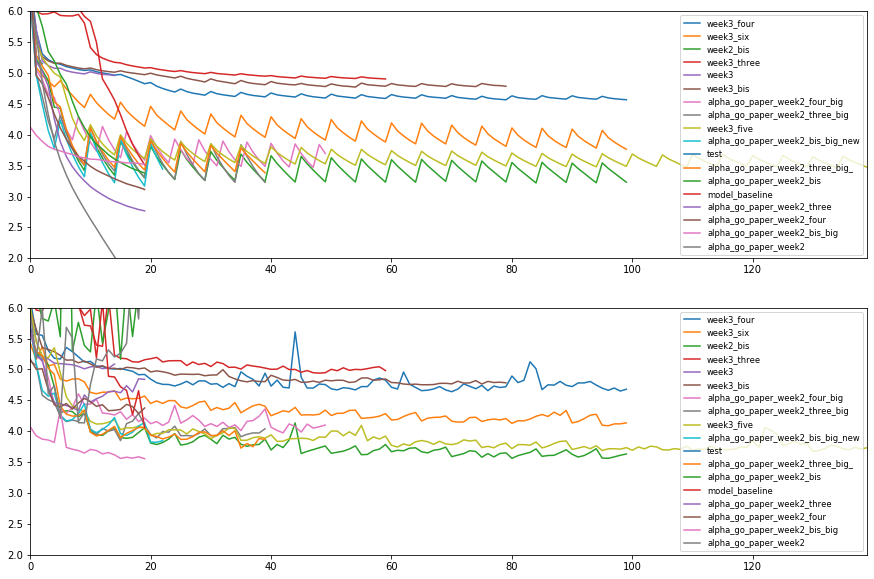

In [48]:
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('small')
# legend([plot1], "title", prop=fontP) 

#plt.plot(metrics_df.iloc[:, metrics_df.columns.get_level_values(1)=='val_loss'])
fig, ax = plt.subplots(2, figsize = (15,10))
metrics_df.swaplevel(0, 1, 1).loc[:,'loss'].plot(ax=ax[0])
metrics_df.swaplevel(0, 1, 1).loc[:,'val_loss'].plot(ax=ax[1])
ax[0].set_ylim(2,6)
ax[1].set_ylim(2,6)
ax[0].legend(prop=fontP)
ax[1].legend(prop=fontP)

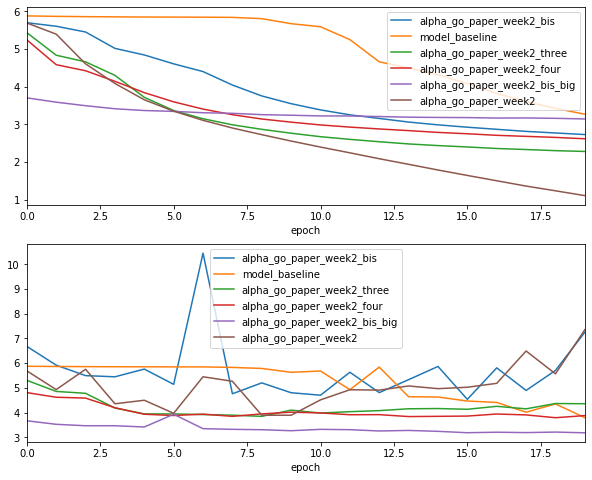

In [11]:
fig, ax = plt.subplots(2, figsize = (10,8))
metrics_df.swaplevel(0, 1, 1).loc[:,'policy_loss'].plot(ax=ax[0])
metrics_df.swaplevel(0, 1, 1).loc[:,'val_policy_loss'].plot(ax=ax[1])

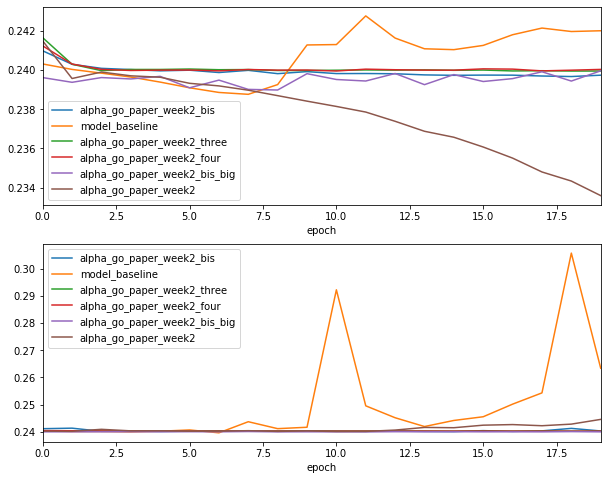

In [5]:
fig, ax = plt.subplots(2, figsize = (10,8))
metrics_df.swaplevel(0, 1, 1).loc[:,'value_loss'].plot(ax=ax[0])
metrics_df.swaplevel(0, 1, 1).loc[:,'val_value_loss'].plot(ax=ax[1])

In [10]:
min_idx = metrics_df.swaplevel(0, 1, 1).loc[:, 'val_loss'].idxmin()
metrics_df.swaplevel(0, 1, 1).loc[min_idx, 'val_loss']

,alpha_go_paper_week2_bis,model_baseline,alpha_go_paper_week2_three,alpha_go_paper_week2_four,alpha_go_paper_week2_bis_big,alpha_go_paper_week2
epoch,,,,,,
15,5.164268,4.719539,4.623861,4.353878,3.560448,5.262716
19,7.910658,4.056144,4.840419,4.376289,3.556075,7.611074
8,5.763300,6.028686,4.332024,4.458502,3.687721,4.138760
18,6.360634,4.656480,4.849396,4.286272,3.586326,5.817107
19,7.910658,4.056144,4.840419,4.376289,3.556075,7.611074
9,5.389034,5.873151,4.588613,4.531685,3.646115,4.135474
